In [1]:
from icp_lib import ICP_Solo, ICP_Cuda, get_object_data, rotate_3d_data, prepare_plot_data, get_max_coord

In [2]:
# Fix seed to avoid randomness
import numpy as np
np.random.seed(12345)

In [3]:
data = get_object_data('objects/person.obj')

Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's off'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'
Unimplemented OBJ format statement 's' on line 's 1'


Vertices number loaded: 49906


In [4]:
rotated_data = rotate_3d_data(data)
limit = get_max_coord(data)

Rotate x by 334.66179341417325 degrees
Rotate y by 113.89519964944293 degrees
Rotate z by 66.210772203754 degrees


<Axes3D: >

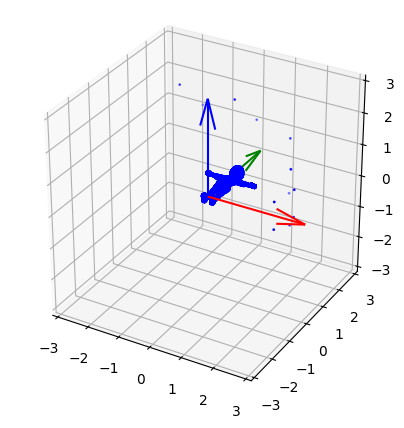

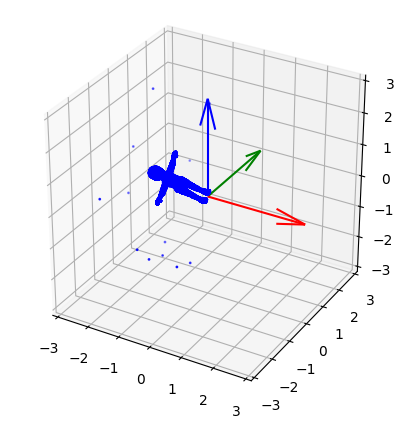

In [5]:
prepare_plot_data(data, limit)
prepare_plot_data(rotated_data, limit)

In [6]:
icp_solo = ICP_Solo(rotated_data, data)
icp_cuda = ICP_Cuda(rotated_data, data)

float64


In [8]:
result = icp_solo.icp(max_iterations=300, split_heighbors=True)

 iteration_n |      mean_error      |      difference      
      1      |  1.0114871770122233  |  1.0114871770122233 
      2      | 0.42190500722488417  | -0.5895821697873391 
      3      |  0.3899335437655698  | -0.03197146345931434
      4      | 0.38561429731716795  | -0.00431924644840187
      5      |  0.383462707810096   | -0.0021515895070719493
      6      |  0.3799014153009983  | -0.003561292509097702
      7      |  0.3678056211570301  | -0.01209579414396822
      8      |  0.3517959117526694  | -0.016009709404360695
      9      |  0.3062630532982013  | -0.045532858454468084
     10      | 0.26567435017127405  | -0.04058870312692725
     11      | 0.24439191446196484  | -0.02128243570930921
     12      | 0.22633442667109455  | -0.018057487790870297
     13      |  0.2054560835491184  | -0.020878343121976145
     14      |  0.1870799680473405  | -0.018376115501777895
     15      | 0.17633995754407067  | -0.010740010503269837
     16      | 0.16159025669361823  | -0.01474

In [9]:
import time
time_list = []
for x in range(32, 1025, 32):
    print('Threads per block:', x)
    start = time.perf_counter()
    result = icp_cuda.icp(max_iterations=300, verbose=False, threads_per_block=x)
    time_list.append((x, time.perf_counter()-start))
print(time_list)

Threads per block: 32


c:\Users\danil\Desktop\python\points_cloud_regestration\win_venv\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Stop reason: Convergence reached
Time elapsed for func icp : 5.746454200008884
Threads per block: 64
Stop reason: Convergence reached
Time elapsed for func icp : 5.752172000007704
Threads per block: 96
Stop reason: Convergence reached
Time elapsed for func icp : 5.410703199915588
Threads per block: 128
Stop reason: Convergence reached
Time elapsed for func icp : 5.286110300105065
Threads per block: 160
Stop reason: Convergence reached
Time elapsed for func icp : 5.057356699835509
Threads per block: 192
Stop reason: Convergence reached
Time elapsed for func icp : 5.124238000018522
Threads per block: 224
Stop reason: Convergence reached
Time elapsed for func icp : 4.982964799972251
Threads per block: 256
Stop reason: Convergence reached
Time elapsed for func icp : 5.705508100101724
Threads per block: 288
Stop reason: Convergence reached
Time elapsed for func icp : 5.098131600068882
Threads per block: 320
Stop reason: Convergence reached
Time elapsed for func icp : 5.647613799897954
Threa

<Axes3D: >

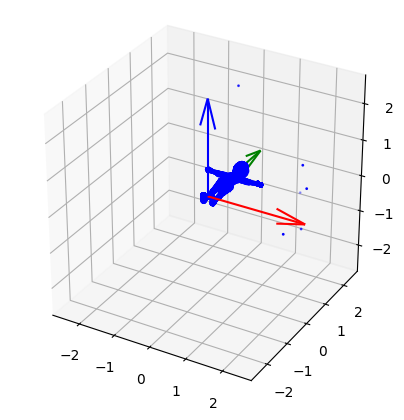

In [9]:
prepare_plot_data(icp_solo.transform(), limit)

In [ ]:
from matplotlib import pyplot as plt

prepare_plot_data(data, limit)
plt.show()

for i in range(10):
    rotated_data = rotate_3d_data(data)
    icp_solo = ICP_Solo(rotated_data, data)
    result = icp_solo.icp(max_iterations=300, verbose=False)
    prepare_plot_data(icp_solo.transform(), limit)
    plt.show()

In [8]:
from numba import cuda

# Get the current GPU device
device = cuda.get_current_device()

# Get the maximum number of threads per block
max_threads_per_block = device.MAX_THREADS_PER_BLOCK

print("Maximum number of threads per block:", max_threads_per_block)

Maximum number of threads per block: 1024
